In [1]:
%run 'RunAnalysis.py'


Dont forget you will need to restart the kernel for any edits you have made to Analysis.py to take effect, before running RunAnalysis.py!

Welcome to JupyROOT 6.22/00
Please enter a comma-seperated list of decay chains.
Use '+' to add data sets together.
Write 'text' if you would prefer to read a list from 'input.txt':
2lep,Zee,Wplus_2lep,Wminus_2lep,ttbar_lep

Would you like to run in fast mode to only analyse 1% of data? (yes/no)
yes
Analysing 2lep...
A
1.827 seconds
B
2.824 seconds
C
3.587 seconds
D
5.958 seconds
Analysing Zee...
22.588 seconds
Analysing Wplus_2lep...
Wplusenu_2lep
0.339 seconds
Wplusmunu_2lep
0.264 seconds
Wplustaunu_2lep
0.146 seconds
Analysing Wminus_2lep...
Wminusenu_2lep
0.181 seconds
Wminusmunu_2lep
0.268 seconds
Wminustaunu_2lep
0.175 seconds
Analysing ttbar_lep...
3.196 seconds
Run completed!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasstack


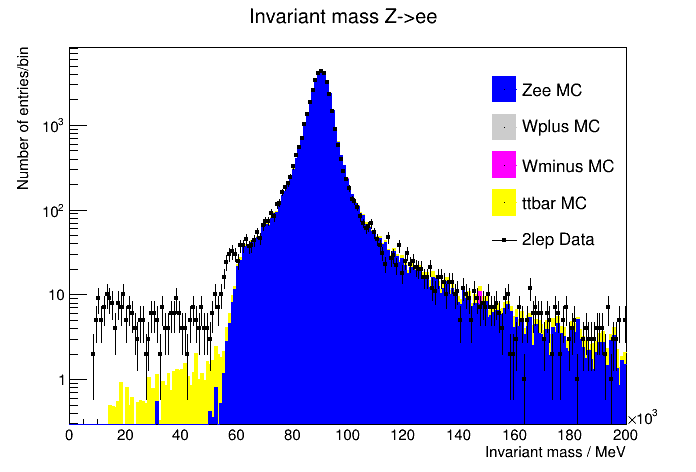

In [7]:
import ROOT as r
from ROOT import *
import os

#2lep,Zee,Zmumu,Ztautau,Wplus_2lep,Wminus_2lep,ttbar_lep

# 2lep,Zee,Wplus_2lep,Wminus_2lep,ttbar_lep

#2lep,Zmumu,Wplus_2lep,Wminus_2lep,ttbar_lep

# Opening files up
histFile_2lep = r.TFile.Open("out/2lep_fast.root", "READ")
histFile_Zee = r.TFile.Open("out/Zee_fast.root","READ")
histFile_Zmumu = r.TFile.Open("out/Zmumu_fast.root","READ")
histFile_Ztautau = r.TFile.Open("out/Ztautau_fast.root","READ")
histFile_Wplus_2lep = r.TFile.Open("out/Wplus_2lep_fast.root", "READ")
histFile_Wminus_2lep = r.TFile.Open("out/Wminus_2lep_fast.root", "READ")
histFile_ttbar_lep = r.TFile.Open("out/ttbar_lep_fast.root", "READ")

histName = "h_inv_mas"

title = "Invariant mass Z->ee"
x_label = "Invariant mass / MeV"
y_label = "Number of entries/bin"

# Difference in azimuthal angle of lepton pair

# Get histograms
dataHist_2lep = histFile_2lep.Get(histName)

mcHist_Zee = histFile_Zee.Get(histName)
# mcHist_Zmumu = histFile_Zmumu.Get(histName)
# mcHist_Ztautau = histFile_Ztautau.Get(histName)
mcHist_Wplus_2lep = histFile_Wplus_2lep.Get(histName)
mcHist_Wminus_2lep = histFile_Wminus_2lep.Get(histName)
mcHist_ttbar_lep = histFile_ttbar_lep.Get(histName)


# Change the histograms directory once read in so that they do not get delected when files close
dataHist_2lep.SetDirectory(0)
mcHist_Zee.SetDirectory(0)
# mcHist_Zmumu.SetDirectory(0)
# mcHist_Ztautau.SetDirectory(0)
mcHist_Wplus_2lep.SetDirectory(0)
mcHist_Wminus_2lep.SetDirectory(0)
mcHist_ttbar_lep.SetDirectory(0)

# Close the files (from which the histograms were retrieved)
histFile_2lep.Close()
histFile_Zee.Close()
# histFile_Zmumu.Close()
# histFile_Ztautau.Close()
histFile_Wplus_2lep.Close()
histFile_Wminus_2lep.Close()
histFile_ttbar_lep.Close()

# MAKING A STACKED PLOT - combining ATLAS w/ MC

# Make a canvas
canvasstack = r.TCanvas("canvasstack")
canvasstack.SetLogy(1)

# Make a stacked histogram
hs = r.THStack("hs","Stacked plot")

# Configure and plot the ATLAS data
dataHist_2lep.SetTitle(title)
dataHist_2lep.GetXaxis().SetTitle(x_label)
dataHist_2lep.GetYaxis().SetTitle(y_label)
dataHist_2lep.SetStats(0)
dataHist_2lep.SetLineColor(r.kBlack)
dataHist_2lep.SetLineWidth(1)
dataHist_2lep.SetMarkerColor(r.kBlack)
dataHist_2lep.SetMarkerStyle(21)
dataHist_2lep.SetMarkerSize(0.5)
dataHist_2lep.Draw("e")

# Add MC contributions to the stacked histogram
mcHist_Zee.SetLineColor(r.kBlue)
mcHist_Zee.SetFillColor(r.kBlue)
hs.Add(mcHist_Zee,"h")

# mcHist_Zmumu.SetLineColor(r.kGreen)
# mcHist_Zmumu.SetFillColor(r.kGreen)
# hs.Add(mcHist_Zmumu,"h")

# mcHist_Ztautau.SetLineColor(r.kRed)
# mcHist_Ztautau.SetFillColor(r.kRed)
# hs.Add(mcHist_Ztautau,"h")



mcHist_Wplus_2lep.SetLineColor(r.kGray)
mcHist_Wplus_2lep.SetFillColor(r.kGray)
hs.Add(mcHist_Wplus_2lep,"h")

mcHist_Wminus_2lep.SetLineColor(r.kMagenta)
mcHist_Wminus_2lep.SetFillColor(r.kMagenta)
hs.Add(mcHist_Wminus_2lep,"h")

mcHist_ttbar_lep.SetLineColor(r.kYellow)
mcHist_ttbar_lep.SetFillColor(r.kYellow)
hs.Add(mcHist_ttbar_lep,"h")

# Draw the stacked plot onto the canvas
hs.Draw("same,hist")

# Draw the data (2lep) on the same canvas
dataHist_2lep.Draw("e,same")

# Edit the x axis range of both stacked plot and data
# hs.GetXaxis().SetRangeUser(0e3,150e3)
# hs.GetYaxis().SetRangeUser(0,7e3)
dataHist_2lep.GetXaxis().SetRangeUser(0e3,200e3)
# dataHist_2lep.GetYaxis().SetRangeUser(0,5.8e3)

# Add a legend to the plot
legend = r.TLegend(0.7,0.45,0.9,0.85)
legend.AddEntry(mcHist_Zee,"Zee MC")
# legend.AddEntry(mcHist_Zmumu,"Zmumu MC")
# legend.AddEntry(mcHist_Ztautau,"Ztautau MC")
legend.AddEntry(mcHist_Wplus_2lep,"Wplus MC")
legend.AddEntry(mcHist_Wminus_2lep,"Wminus MC")
legend.AddEntry(mcHist_ttbar_lep,"ttbar MC")
legend.AddEntry(dataHist_2lep,"2lep Data")

legend.SetLineWidth(0)
legend.Draw("same")

# Plot the canvas
canvasstack.Draw()

##### 